# Task 1: Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df1.shape

(891, 12)

<AxesSubplot:>

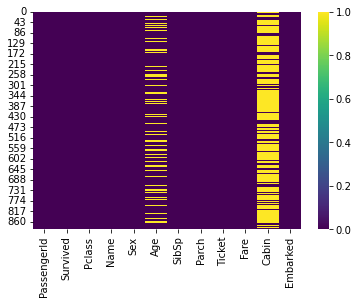

In [7]:
sns.heatmap(df1.isnull() , cmap = 'viridis')

In [8]:
df1.isnull().sum()*100/len(df1)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
df1.drop(["Cabin","Name","PassengerId","Ticket"],axis=1,inplace=True)

In [10]:
df1.Age.fillna(df1['Age'].median(),inplace=True)

In [11]:
df1.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

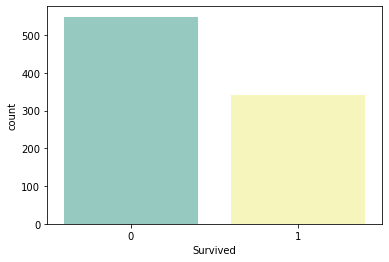

In [12]:
sns.countplot(df1.Survived , palette='Set3')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

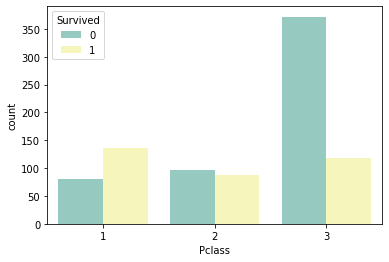

In [13]:
sns.countplot(x=df1.Pclass , hue = df1.Survived , palette='Set3')

In [14]:
df1.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

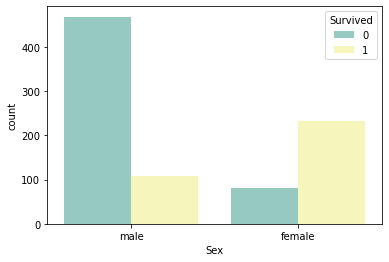

In [15]:
sns.countplot(x = df1.Sex, hue = df1.Survived , palette='Set3')

In [16]:
df1.Sex=df1.Sex.map({'male':1 , 'female':0})

In [17]:
df1.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

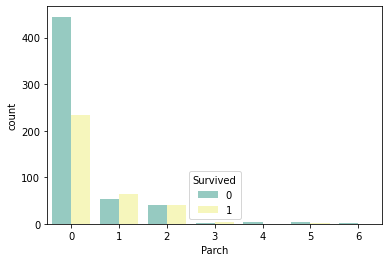

In [18]:
sns.countplot(x = df1.Parch , hue = df1.Survived , palette='Set3')

In [19]:
df1.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

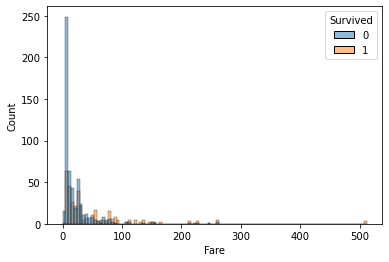

In [20]:
sns.histplot(x = df1.Fare , hue = df1.Survived)

<AxesSubplot:xlabel='Fare'>

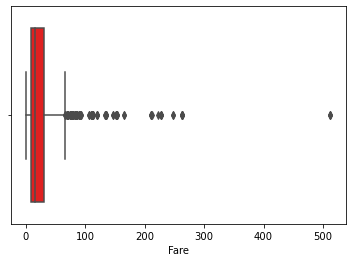

In [21]:
sns.boxplot(df1.Fare ,color='red')

In [22]:
q1 = df1.Fare.quantile(0.25)
q3 = df1.Fare.quantile(0.75)
iqr = q3 - q1

In [23]:
u_b_Fare = q3 + (1.5*iqr)
l_b_Fare = q1 - (1.5*iqr)

In [24]:
df1.Fare = np.where(df1.Fare>u_b_Fare,u_b_Fare, np.where(df1.Fare <l_b_Fare, l_b_Fare, df1.Fare))

<AxesSubplot:xlabel='Fare'>

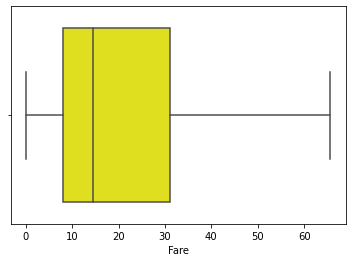

In [25]:
sns.boxplot(df1.Fare , color='yellow')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

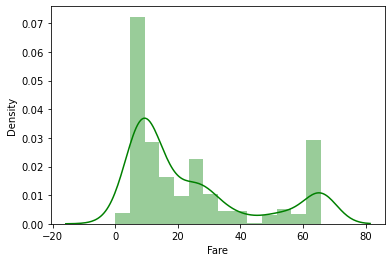

In [26]:
sns.distplot(df1.Fare , color= 'green')

In [27]:
df1.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

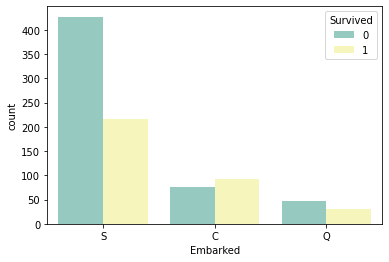

In [28]:
sns.countplot(df1.Embarked , hue = df1.Survived , palette='Set3')

In [29]:
df1.Embarked = df1.Embarked.map({'S':1 , 'C':2 , 'Q':3})

In [30]:
df1.Embarked.fillna(df1['Embarked'].mean(),inplace=True)

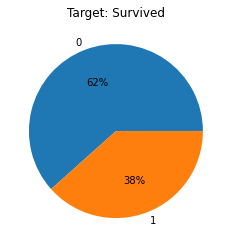

In [31]:
target_var = pd.crosstab(index = df1['Survived'] , columns = '% observations')
plt.pie(target_var['% observations'] , labels = target_var['% observations'].index , autopct = '%.0f%%')
plt.title('Target: Survived')
plt.show()

In [32]:
x = df1.drop(['Survived'],axis = 1)
y = df1.Survived

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 8)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression(solver = 'liblinear' , random_state = 8) 

In [35]:
model = log1.fit(x_train , y_train)

In [36]:
model.intercept_

array([2.57343455])

In [37]:
model.coef_

array([[-0.57486888, -2.66450018, -0.0247922 , -0.43891315, -0.22199375,
         0.02516677,  0.17857836]])

In [38]:
y_pred = model.predict(x_train)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_train,y_pred))

[[384  57]
 [ 77 194]]


In [40]:
print(classification_report(y_train , y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       441
           1       0.77      0.72      0.74       271

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712



In [41]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
y_p_p = model.predict_proba(x_test)
fpr , tpr , threshold = roc_curve(y_test , y_p_p[:,1])    
roc_auc = auc(fpr , tpr)
print(roc_auc)

0.807642149191445


In [42]:
ac=accuracy_score(y_train , y_pred)
print("Accuracy score of training data:",ac)

Accuracy score of training data: 0.8117977528089888


In [43]:
y_pred = model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[90 18]
 [29 42]]


In [45]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       108
           1       0.70      0.59      0.64        71

    accuracy                           0.74       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.73      0.74      0.73       179



In [46]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
y_p_p = model.predict_proba(x_test)
fpr , tpr , threshold = roc_curve(y_test , y_p_p[:,1])    
roc_auc = auc(fpr , tpr)
print(roc_auc)

0.807642149191445


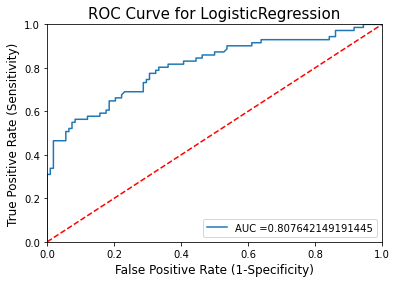

In [47]:
plt.title('ROC Curve for LogisticRegression',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0 , 1], [0, 1],'r--')
plt.xlim([0 , 1])
plt.ylim([0 , 1])
plt.plot(fpr , tpr , label = 'AUC =' +str(roc_auc))
plt.legend(loc = 4) #Location of label
plt.show()

In [48]:
ac=accuracy_score(y_test , y_pred)
print("Accuracy score of test data:",ac)

Accuracy score of test data: 0.7374301675977654


# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
params = {'n_estimators':[20,40,60,80,100],
          'max_features':['sqrt',0.25,0.50,0.75,1],
          'min_samples_split':[2,4,6]}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(rf,params,cv = 10,random_state = 8)
search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['sqrt', 0.25, 0.5,
                                                         0.75, 1],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=8)

In [52]:
search.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=60)

In [53]:
rf2 = search.best_estimator_
model_rf = rf2.fit(x_train,y_train)

In [54]:
y_pred = model_rf.predict(x_test)

In [55]:
print(confusion_matrix(y_pred,y_test))

[[92 18]
 [16 53]]


In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.75      0.77      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [57]:
roc_auc_score(y_pred,y_test)

0.8022397891963109

In [58]:
y_pred_prob = model_rf.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.8692618675013042

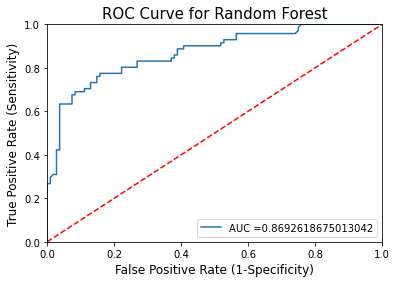

In [59]:
plt.title('ROC Curve for Random Forest',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [60]:
ac=accuracy_score(y_test , y_pred)
print("Accuracy score of Random Forest data:",ac)

Accuracy score of Random Forest data: 0.8100558659217877


# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
model_params = {'criterion' : ['gini','entropy'],
                'max_depth': [1,2,3,4,5,6,7,8,9,None]}

In [63]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(dt,model_params,cv = 10)
search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [64]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [65]:
dtree2 = DecisionTreeClassifier(criterion= 'gini', max_depth = None)

In [66]:
model = dtree2.fit(x_train,y_train)

In [67]:
y_pred = model.predict(x_test)

In [68]:
print(confusion_matrix(y_pred,y_test))

[[88 21]
 [20 50]]


In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        70

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [70]:
roc_auc_score(y_pred,y_test)

0.7608125819134994

In [71]:
y_pred_prob = model.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.7754955659885238

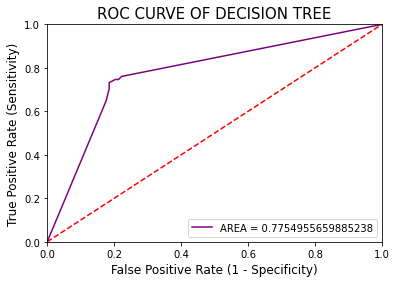

In [72]:
plt.plot(fpr,tpr,'purple',label = 'AREA = ' +str(roc_auc));
plt.legend(loc = 4);
plt.plot([0,1],[0,1],'--r');
plt.xlim([0,1]);
plt.ylim([0,1]);
plt.title('ROC CURVE OF DECISION TREE',size = 15);
plt.xlabel('False Positive Rate (1 - Specificity)',size = 12);
plt.ylabel('True Positive Rate (Sensitivity)',size = 12);

In [73]:
ac=accuracy_score(y_test , y_pred)
print("Accuracy score of Decision Tree data:",ac)

Accuracy score of Decision Tree data: 0.770949720670391


# SVM

In [74]:
from sklearn import svm
svc = svm.SVC(class_weight='balanced', probability=True)
model_svc = svc.fit(x_train,y_train)
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [75]:
y_pred = model_svc.predict(x_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,auc,roc_curve

In [77]:
accuracy_score(y_test,y_pred)

0.659217877094972

In [78]:
print(confusion_matrix(y_test,y_pred))

[[76 32]
 [29 42]]


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       108
           1       0.57      0.59      0.58        71

    accuracy                           0.66       179
   macro avg       0.65      0.65      0.65       179
weighted avg       0.66      0.66      0.66       179



In [80]:
roc_auc_score(y_test,y_pred)

0.6476264997391759

In [81]:
y_pred_prob = model_svc.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.7180490349504434

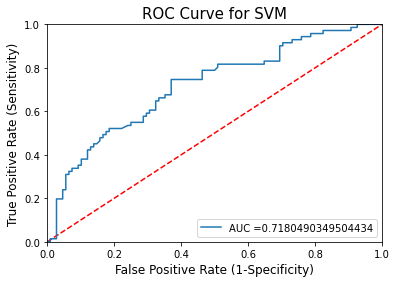

In [82]:
plt.title('ROC Curve for SVM',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [83]:
ac=accuracy_score(y_test , y_pred)
print("Accuracy score of SVM:",ac)

Accuracy score of SVM: 0.659217877094972
